# Random Forest Algorithm

Random Forest is a widely-used machine learning algorithm that falls under the category of supervised learning. It is versatile and can be applied to both **Classification** and **Regression** problems in machine learning. The algorithm is based on the principle of **ensemble learning**, which involves combining multiple models (classifiers) to address complex problems and enhance the overall performance of the model.

## What is Random Forest?

As the name implies, Random Forest is a classifier that consists of multiple **decision trees** trained on various subsets of the given dataset. Instead of relying on a single decision tree, it aggregates the predictions from all the trees and determines the final output based on **majority voting** (for classification) or **averaging** (for regression). This approach significantly improves the predictive accuracy of the model.

The more trees in the forest, the higher the accuracy, and the better the algorithm is at preventing **overfitting**.

![Random Forest Image](image_link_here)

---

## Assumptions for Random Forest

Since Random Forest combines the predictions of multiple decision trees, it is possible that some trees may predict correctly while others may not. However, collectively, the trees produce accurate results. To ensure optimal performance, the following assumptions are made:

1. **Actual Values in Features**: The dataset should contain meaningful and actual values in its feature variables to enable accurate predictions rather than relying on guesswork.
2. **Low Correlation Between Trees**: The predictions from individual trees should have very low correlations to ensure diversity and improve the model's robustness.

---

## Why Use Random Forest?

Here are some key reasons to use the Random Forest algorithm:

- It requires **less training time** compared to many other algorithms.
- It delivers **highly accurate predictions**, even for large datasets, and operates efficiently.
- It maintains accuracy even when a significant portion of the data is missing.

---

## How Does the Random Forest Algorithm Work?

The Random Forest algorithm operates in two phases:

1. **Creation of the Random Forest**: Combines **N** decision trees.
2. **Prediction Phase**: Makes predictions using each tree created in the first phase.

### Working Process

The step-by-step process of the Random Forest algorithm is as follows:

1. **Step 1**: Select **K** random data points from the training set (with replacement).
2. **Step 2**: Build decision trees using the selected data points (subsets).
3. **Step 3**: Choose the number **N** of decision trees to build.
4. **Step 4**: Repeat Steps 1 and 2 to create **N** decision trees.
5. **Step 5**: For new data points, collect predictions from each tree and assign the final output based on **majority voting** (classification) or **averaging** (regression).

### Example

Consider a dataset containing images of various fruits. The dataset is divided into subsets, and each subset is used to train a decision tree. During the training phase, each tree produces a prediction. When a new data point is introduced, the Random Forest classifier aggregates the predictions from all trees and makes the final decision based on the majority vote.

![Random Forest Example Image](image_link_here)

---

## Applications of Random Forest

Random Forest is widely used in the following sectors:

1. **Banking**: Identifying loan risks.
2. **Medicine**: Predicting disease trends and assessing health risks.
3. **Land Use**: Classifying areas with similar land use.
4. **Marketing**: Analyzing and predicting marketing trends.

---

## Advantages of Random Forest

- Capable of handling both **Classification** and **Regression** tasks.
- Effective in managing large datasets with high dimensionality.
- Improves model accuracy and prevents overfitting.

---

## Disadvantages of Random Forest

- While Random Forest can be used for both classification and regression, it is **less suitable for regression tasks** compared to classification.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error,mean_squared_error,accuracy_score,r2_score

In [ ]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
le=LabelEncoder()
for i in df.columns:
  if df[i].dtype=='category' or df[i].dtype=='object':
    df[i]=le.fit_transform(df[i])


In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [ ]:
X=df.drop('sex',axis=1)
y=df['sex']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=200,random_state=42)
classification_model=model.fit(X_train,y_train)
classification_model


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred=classification_model.predict(X_test)

In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("------------------------------------")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("------------------------------------")
print('classification report:\n', classification_report(y_test, y_pred))


Accuracy Score: 0.6122448979591837
------------------------------------
Confusion Matrix:
 [[ 7 12]
 [ 7 23]]
------------------------------------
classification report:
               precision    recall  f1-score   support

           0       0.50      0.37      0.42        19
           1       0.66      0.77      0.71        30

    accuracy                           0.61        49
   macro avg       0.58      0.57      0.57        49
weighted avg       0.60      0.61      0.60        49



<Axes: >

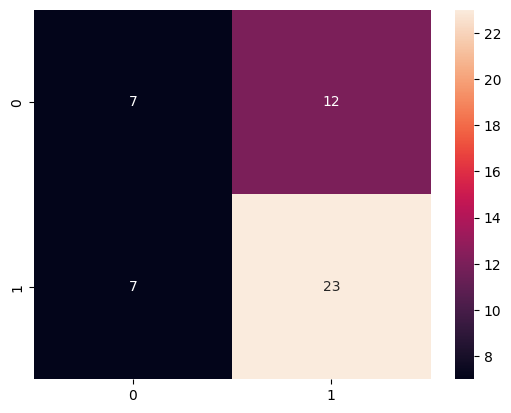

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
# Use random Forest for Regression task
X = df.drop('tip', axis = 1)
y = df['tip']

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#create, train and predict the model
model_reg = RandomForestRegressor()
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)

# evaluate the model
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

mean squared error:  0.9297831895918378
mean absolute error:  0.7643489795918367
r2 score:  0.2561563966181041
root mean squared error:  0.9642526585868653
